In [13]:
from astropy.table import Table, vstack
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import pandas as pd
from datetime import datetime
import sys
size_outside = 400 # phe
import copy
ring_size_upper = 10000

In [3]:
muon_files = glob.glob('/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/*')

df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:1]] 
df_all_data = pd.concat(df_files, ignore_index=True)
df_good_data_real = df_all_data[(df_all_data['muon_efficiency'] < 1) & (df_all_data['size_outside'] < 500)]
del(df_all_data)


listdir_z0 = glob.glob('/Users/vdk/muons2024/lapalma_simulations/zenith_scan/zenith0/*')
listdir_z10 = glob.glob('/Users/vdk/muons2024/lapalma_simulations/zenith_scan/zenith10/*')
listdir_z20 = glob.glob('/Users/vdk/muons2024/lapalma_simulations/zenith_scan/zenith20/*')
listdir_z30 = glob.glob('/Users/vdk/muons2024/lapalma_simulations/zenith_scan/zenith30/*')
listdir_z40 = glob.glob('/Users/vdk/muons2024/lapalma_simulations/zenith_scan/zenith40/*')
listdir_z50 = glob.glob('/Users/vdk/muons2024/lapalma_simulations/zenith_scan/zenith50/*')

dat = Table.read('{}'.format(listdir_z0[0]), format='fits')

for muon_file in listdir_z0:
    dat2 = Table.read(muon_file, format='fits')
    dat2['good_ring'] = dat2['good_ring'].astype(bool)
    dat2['is_valid'] = dat2['is_valid'].astype(bool)
    dat2['parameters_at_limit'] = dat2['parameters_at_limit'].astype(bool)
    dat = vstack([dat, dat2])
min_impact = min(df_good_data_real['impact_parameter'])
max_impact = max(df_good_data_real['impact_parameter']) 
df = dat.to_pandas()
df_good_data = df[(df['muon_efficiency'] < 1) & 
                      (df['size_outside'] < 500) &
                      (df['impact_parameter'] < max_impact) &
                      (df['impact_parameter'] > min_impact)]

df_good_data

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_97421/1559297078.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:1]]


,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_y_array,is_valid,parameters_at_limit,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,100,NaN,0.025224,2552.977051,0.0,0.312654,0.294992,1.211371,0.029066,True,...,-4.736883e-11,True,True,0.032396,0.262401,0.069300,508,1.242008,NaN,NaN
1,101,NaN,0.025224,2186.744629,0.0,0.281862,0.284531,1.203705,0.062137,True,...,6.703967e+00,False,False,0.046988,0.203292,-0.406635,501,1.265869,NaN,NaN
4,104,NaN,0.025224,2471.485840,0.0,0.288599,0.289549,1.193752,0.060419,True,...,-5.459198e+00,True,False,0.045723,0.621230,0.499906,496,1.293827,NaN,NaN
5,200,NaN,0.024201,2474.640625,0.0,0.918258,0.265949,1.186230,0.045645,True,...,-4.281569e-01,True,False,0.044178,0.287458,-0.179224,465,1.366082,NaN,NaN
6,201,NaN,0.024201,2398.653564,0.0,0.910336,0.257434,1.208101,0.063050,True,...,-7.407449e+00,True,False,0.052620,0.312414,0.147612,480,1.233841,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441126,664201,NaN,0.034482,2580.090332,0.0,-0.434023,-0.154874,1.213936,0.047875,True,...,4.777961e+00,False,False,0.044562,0.291352,0.068091,511,1.293829,NaN,NaN
441127,664202,NaN,0.034482,2692.687744,0.0,-0.420026,-0.149227,1.222260,0.046679,True,...,6.345752e+00,True,False,0.042714,0.184920,0.037726,521,1.249817,NaN,NaN
441128,664203,NaN,0.034482,2346.212158,0.0,-0.436917,-0.180407,1.225422,0.069014,True,...,-5.726369e+00,True,False,0.053242,0.682941,0.481731,520,1.263743,NaN,NaN
441129,664204,NaN,0.034482,2660.815186,0.0,-0.433900,-0.156988,1.211791,0.039971,True,...,4.556689e+00,True,False,0.039315,0.224043,-0.061454,511,1.292391,NaN,NaN


In [5]:
ring_size_upper = 10000
ring_completeness_cut = 0.9
ring_containment_cut = 0.9
bin_number = 8
colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#e377c2',  # raspberry yogurt pink
    '#8c564b',  # chestnut brown
]

def format_axes(ax,option):
    
    if(option=='width'):
        ax.set_xlabel('Muon radius [deg]')
        ax.set_ylabel('Muon ring width [deg]')
        ax.grid(linestyle="dashed")
        ax.set_ylim(0.042,0.14)
        ax.set_xlim(1.0,1.25)
        ax.legend()
    if(option=='size'):
        ax2.grid(linestyle="dashed")
        ax2.legend(ncol=2)
        ax2.set_xlabel('Muon radius [deg]')
        ax2.set_ylabel('Muon Size [pe]')
        ax2.set_ylim(2000,4000)
        ax2.set_xlim(1.0,1.25)

alpha_reg = 1



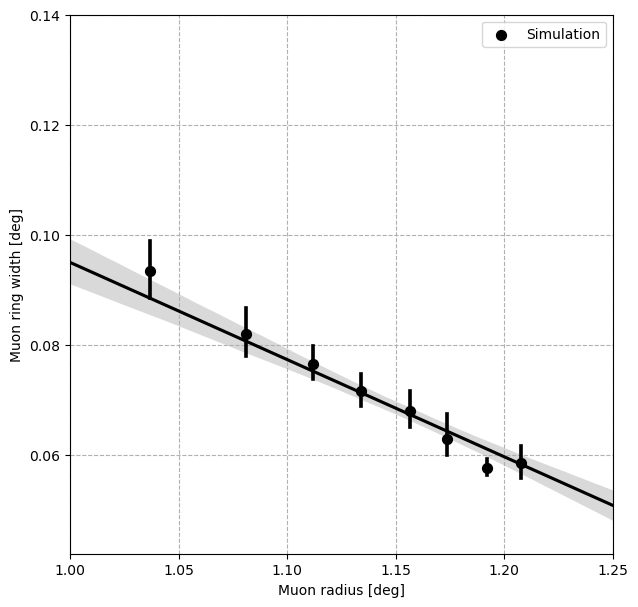

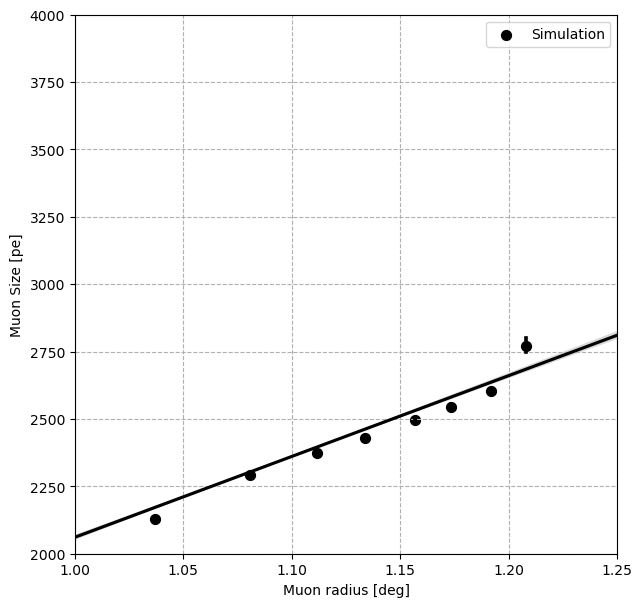

In [7]:
fig,ax = plt.subplots(figsize=(7, 7))
fig2,ax2 = plt.subplots(figsize=(7, 7))

sns.regplot(x = df_good_data['ring_radius'][(df_good_data['ring_completeness'] > ring_completeness_cut) & 
                                            (df_good_data['ring_containment'] > ring_containment_cut) & 
                                            (df_good_data['size_outside'] < size_outside) & 
                                            (df_good_data['ring_size'] < ring_size_upper)  & 
                                            (df_good_data['muon_efficiency'] < 1)], 
            y = df_good_data['ring_width'][(df_good_data['ring_completeness'] > ring_completeness_cut) &
                                           (df_good_data['ring_containment'] > ring_containment_cut) &  
                                           (df_good_data['size_outside'] < size_outside) & 
                                           (df_good_data['ring_size'] < ring_size_upper)  & 
                                           (df_good_data['muon_efficiency'] < 1)], 
            x_bins=bin_number, ax=ax, color='k', label = 'Simulation')

sns.regplot(x = df_good_data['ring_radius'][(df_good_data['ring_completeness'] > 0.9) &
                                            (df_good_data['ring_containment'] > ring_containment_cut) &  
                                            (df_good_data['size_outside'] < size_outside) & 
                                            (df_good_data['ring_size'] < ring_size_upper) & 
                                            (df_good_data['muon_efficiency'] < 1)], 
            y = df_good_data['ring_size'][(df_good_data['ring_completeness'] > 0.9) & 
                                          (df_good_data['ring_containment'] > ring_containment_cut) & 
                                          (df_good_data['size_outside'] < size_outside) & 
                                          (df_good_data['ring_size'] < ring_size_upper) & 
                                          (df_good_data['muon_efficiency'] < 1)], 
            x_bins=bin_number, ax=ax2, color='k', label = 'Simulation')

format_axes(ax,'width')        
format_axes(ax2,'size')

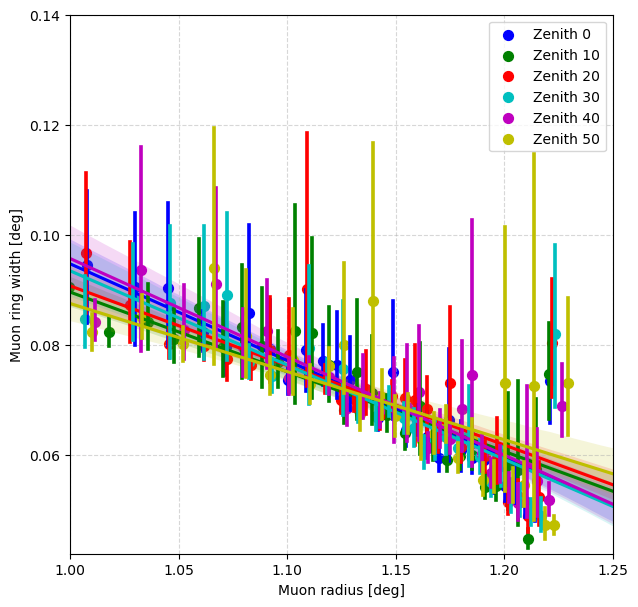

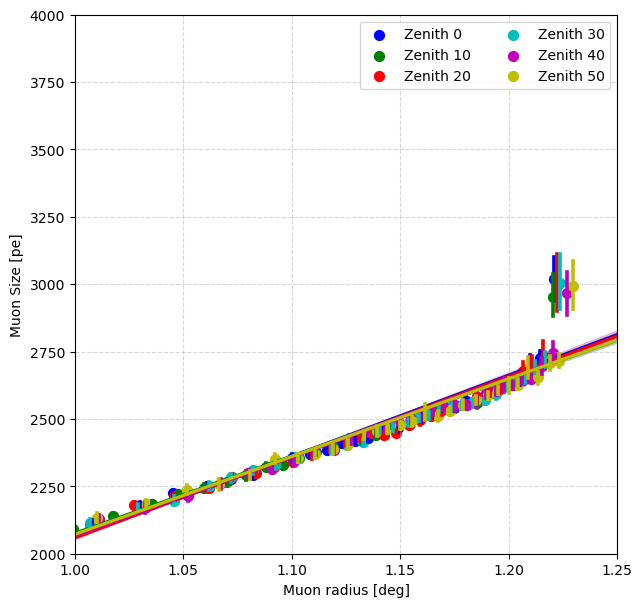

In [19]:
# Directories for each zenith angle
zenith_dirs = {
    '0': '/Users/vdk/muons2024/lapalma_simulations/zenith_scan/zenith0/*',
    '10': '/Users/vdk/muons2024/lapalma_simulations/zenith_scan/zenith10/*',
    '20': '/Users/vdk/muons2024/lapalma_simulations/zenith_scan/zenith20/*',
    '30': '/Users/vdk/muons2024/lapalma_simulations/zenith_scan/zenith30/*',
    '40': '/Users/vdk/muons2024/lapalma_simulations/zenith_scan/zenith40/*',
    '50': '/Users/vdk/muons2024/lapalma_simulations/zenith_scan/zenith50/*'
}

# Initialize dictionary to hold data for each zenith angle
df_dict = {}

# Loop through each directory and combine data
for zenith, zenith_dir in zenith_dirs.items():
    listdir = glob.glob(zenith_dir)
    dat_combined = Table()
    for muon_file in listdir:
        dat2 = Table.read(muon_file, format='fits')
        dat2['good_ring'] = dat2['good_ring'].astype(bool)
        dat2['is_valid'] = dat2['is_valid'].astype(bool)
        dat2['parameters_at_limit'] = dat2['parameters_at_limit'].astype(bool)
        dat_combined = vstack([dat_combined, dat2])
    
    # Convert to pandas DataFrame
    df = dat_combined.to_pandas()
    
    # Store the dataframe in the dictionary
    df_dict[zenith] = df

# Plotting
fig, ax = plt.subplots(figsize=(7, 7))
fig2, ax2 = plt.subplots(figsize=(7, 7))

# Define plot parameters
ring_completeness_cut = 0.9
ring_containment_cut = 0.8
size_outside = 500
ring_size_upper = 10000
bin_number = 30

# Define colors for each zenith angle
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot each zenith angle data
for i, (zenith, df) in enumerate(df_dict.items()):
    df_good_data = df[(df['muon_efficiency'] < 1) & 
                      (df['size_outside'] < 500) &
                      (df['impact_parameter'] < max_impact) &
                      (df['impact_parameter'] > min_impact)]
    
    sns.regplot(x = df_good_data['ring_radius'][(df_good_data['ring_completeness'] > ring_completeness_cut) & 
                                                (df_good_data['ring_containment'] > ring_containment_cut) & 
                                                (df_good_data['size_outside'] < size_outside) & 
                                                (df_good_data['ring_size'] < ring_size_upper)  & 
                                                (df_good_data['muon_efficiency'] < 1)], 
                y = df_good_data['ring_width'][(df_good_data['ring_completeness'] > ring_completeness_cut) &
                                               (df_good_data['ring_containment'] > ring_containment_cut) &  
                                               (df_good_data['size_outside'] < size_outside) & 
                                               (df_good_data['ring_size'] < ring_size_upper)  & 
                                               (df_good_data['muon_efficiency'] < 1)], 
                x_bins=bin_number, ax=ax, color=colors[i], label=f'Zenith {zenith}')

    sns.regplot(x = df_good_data['ring_radius'][(df_good_data['ring_completeness'] > 0.9) &
                                                (df_good_data['ring_containment'] > ring_containment_cut) &  
                                                (df_good_data['size_outside'] < size_outside) & 
                                                (df_good_data['ring_size'] < ring_size_upper) & 
                                                (df_good_data['muon_efficiency'] < 1)], 
                y = df_good_data['ring_size'][(df_good_data['ring_completeness'] > 0.9) & 
                                              (df_good_data['ring_containment'] > ring_containment_cut) & 
                                              (df_good_data['size_outside'] < size_outside) & 
                                              (df_good_data['ring_size'] < ring_size_upper) & 
                                              (df_good_data['muon_efficiency'] < 1)], 
                x_bins=bin_number, ax=ax2, color=colors[i], label=f'Zenith {zenith}')

# Adding legends to the plots
ax.legend()
ax2.legend()
format_axes(ax,'width')        
format_axes(ax2,'size')
ax.grid(alpha = 0.5)
ax2.grid(alpha = 0.5)
plt.show()

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_97421/2527756699.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = df_extracted_data.groupby(f'{x_value_str}_bin')[y_value_str].mean().reset_index()
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_97421/2527756699.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = df_extracted_data.groupby(f'{x_value_str}_bin').size().reset_index(name='count')
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_97421/2527756699.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to Tru

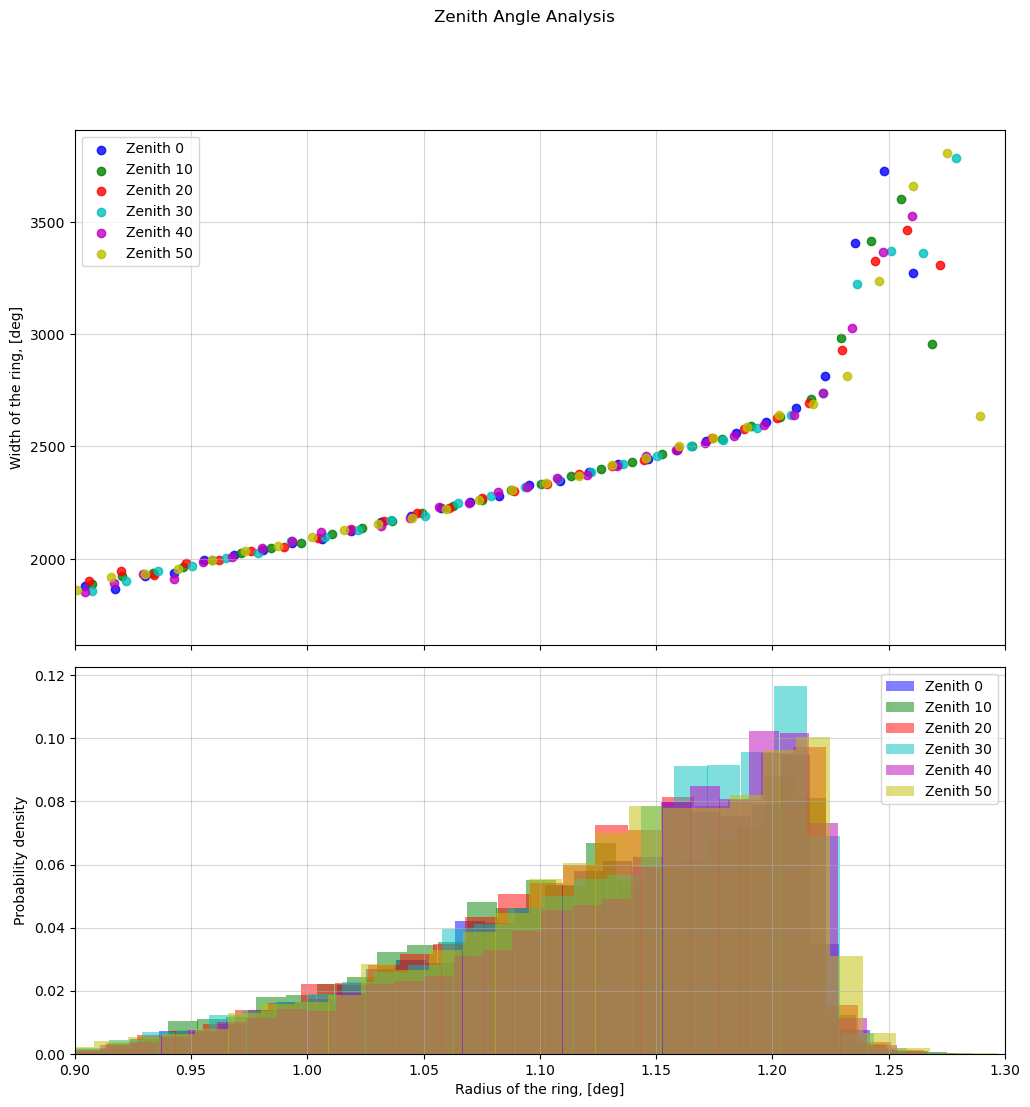

In [23]:
# Plotting parameters
x_value_str = 'ring_radius'
y_value_str = 'ring_size'
ring_completeness_cut = 0.9
ring_containment_cut = 0.9
size_outside = 500
bin_number = 30

# Create a single figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True, gridspec_kw={'height_ratios': [4, 3]})
fig.subplots_adjust(hspace=0.05)

ax = axes[0]
bx = axes[1]

# Define colors for each zenith angle
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot each zenith angle data
for i, (zenith, df) in enumerate(df_dict.items()):
    df_good_data = df[(df['muon_efficiency'] < 1) & 
                      (df['size_outside'] < 500) &
                      (df['ring_completeness'] > ring_completeness_cut) & 
                      (df['ring_containment'] > ring_containment_cut)]

    df_extracted_data = copy.deepcopy(df_good_data)
    
    # Step 1: Create bins for 'ring_radius'
    df_extracted_data[f'{x_value_str}_bin'] = pd.cut(df_extracted_data[x_value_str], bins=30)
    
    # Step 2: Group by the new bin column and calculate mean 'ring_size' for each bin
    binned_data = df_extracted_data.groupby(f'{x_value_str}_bin')[y_value_str].mean().reset_index()
    
    # Step 3: Convert the bin intervals to strings (for plotting) or use midpoints
    binned_data['bin_mid'] = binned_data[f'{x_value_str}_bin'].apply(lambda x: x.mid)
    
    # Calculate number of elements in each bin
    bin_counts = df_extracted_data.groupby(f'{x_value_str}_bin').size().reset_index(name='count')
    
    # Merge the counts back with the mean calculations if needed
    binned_data_with_counts = binned_data.merge(bin_counts, on=f'{x_value_str}_bin')

    ax.scatter(binned_data_with_counts['bin_mid'], binned_data_with_counts[y_value_str], 
               label=f'Zenith {zenith}', alpha=0.8, color=colors[i])
    
    x_pos = list(binned_data_with_counts['bin_mid'])
    y_pos = np.array(binned_data_with_counts['count'])
    y_pos = y_pos / sum(y_pos)
    bx.bar(x_pos, y_pos, width=(max(x_pos)-min(x_pos))/(len(x_pos)-1), alpha=0.5, label=f'Zenith {zenith}', color=colors[i])

ax.set_ylabel('Width of the ring, [deg]')
ax.legend()
ax.grid(alpha=0.5)

bx.set_ylabel('Probability density')
bx.legend()
bx.grid(alpha=0.5)

plt.xlim(0.9, 1.3)
plt.xlabel('Radius of the ring, [deg]')
plt.grid(alpha=0.5)
plt.suptitle('Zenith Angle Analysis')
plt.show()

In [28]:
df_dict['0'].columns

Index(['event_id', 'event_time', 'mc_energy', 'ring_size', 'size_outside',
       'ring_center_x', 'ring_center_y', 'ring_radius', 'ring_width',
       'good_ring', 'muon_efficiency', 'ring_containment', 'ring_completeness',
       'impact_parameter', 'impact_x_array', 'impact_y_array', 'is_valid',
       'parameters_at_limit', 'radial_stdev', 'radial_skewness',
       'radial_excess_kurtosis', 'num_pixels_in_ring',
       'mean_pixel_charge_around_ring', 'hg_peak_sample', 'lg_peak_sample'],
      dtype='object')